In [6]:
import numpy as np
from MLP import MultiLayerPerceptron
from matplotlib import pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


## Train an MLP with 2 inputs, 3-4+ hidden units and one output on the
### following examples (XOR function):
((0, 0), 0)
((0, 1), 1)
((1, 0), 1)
((1, 1), 0)

C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: overflow encountered in sinh
  return np.sinh(x) / np.cosh(x)
C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: overflow encountered in cosh
  return np.sinh(x) / np.cosh(x)
C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: invalid value encountered in divide
  return np.sinh(x) / np.cosh(x)


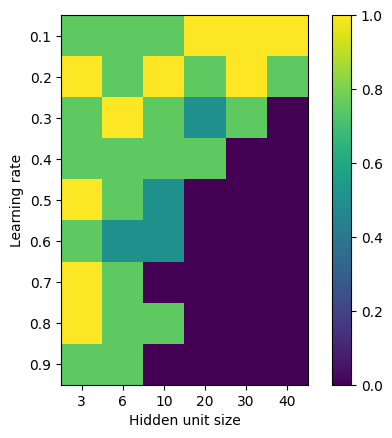

<Figure size 640x480 with 0 Axes>

In [3]:
hidden_unit_sizes = [3, 6, 10, 20, 30, 40]
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# plot alpha values against hidden unit size for the MLP on the XOR function
# use a scatter plot
total_accuracy = np.zeros((len(alpha_values), len(hidden_unit_sizes)))

def accuracy(network, I, t):
    # Calculate the accuracy of the model
    y_pred = np.round(network.forward(I))
    return np.mean(y_pred == t)

def train_and_evaluate(alpha, hidden_unit_size):
    # Create the MLP
    network = MultiLayerPerceptron(2, hidden_unit_size, 1)
    network.randomise()

    # Train the MLP
    for epoch in range(10000):
        network.train(X, y, alpha)

    # Calculate accuracy
    return accuracy(network, X, y)

for i, learning_rate in enumerate(alpha_values):
    for j, hidden_unit_size in enumerate(hidden_unit_sizes):
        total_accuracy[i, j] = train_and_evaluate(learning_rate, hidden_unit_size)

plt.imshow(total_accuracy, cmap='viridis')
plt.xticks(np.arange(len(hidden_unit_sizes)), hidden_unit_sizes)
plt.xlabel('Hidden unit size')
plt.yticks(np.arange(len(alpha_values)), alpha_values)
plt.ylabel('Learning rate')
plt.colorbar()
plt.show()
location = "figures/mlp_alpha_units"
plt.savefig(f"{location}.png")


[[ 0.        ]
 [ 0.72026281]
 [ 0.65823207]
 [-0.17560049]]


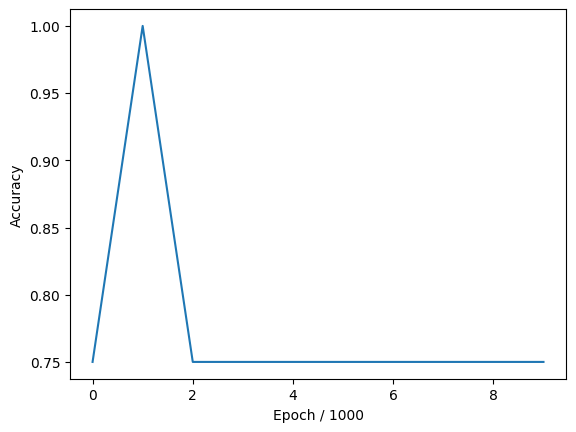

In [5]:
# show error and accuracy over time
accuracy_values = []

network = MultiLayerPerceptron(2, 10, 1)
network.randomise()

# Train the MLP
for epoch in range(10000):
    network.train(X, y, 0.2)

    if epoch % 1000 == 0:
        accuracy_values.append(accuracy(network, X, y))

print(network.forward(X))

plt.plot(accuracy_values)
plt.xlabel('Epoch / 1000')
plt.ylabel('Accuracy')
plt.show()